# **Ali's Data Analysis**

<br>

## **Setup**

In [9]:
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
data = pd.read_csv("TestDataRecording")
display(data)
data.describe()

,who,xcor,ycor,owner-id,implements-WSA,yield,Year,Lead Farmers,Desperation,Jealousy,Grace Period Length,UniqueID
0,1085.0,25.0,17.0,784.0,0.0,50.000000,0,10,0,2,3,2023-11-27 14:45:01.473628
1,1109.0,25.0,25.0,666.0,0.0,50.000000,0,10,0,2,3,2023-11-27 14:45:01.473628
2,1124.0,25.0,-21.0,422.0,0.0,50.000000,0,10,0,2,3,2023-11-27 14:45:01.473628
3,1260.0,25.0,9.0,335.0,0.0,50.000000,0,10,0,2,3,2023-11-27 14:45:01.473628
4,1280.0,25.0,5.0,216.0,0.0,50.000000,0,10,0,2,3,2023-11-27 14:45:01.473628
...,...,...,...,...,...,...,...,...,...,...,...,...
28606,3074.0,-25.0,6.0,640.0,1.0,65.579194,10,10,0,2,3,2023-11-27 14:45:01.473628
28607,3107.0,-25.0,12.0,762.0,0.0,61.173142,10,10,0,2,3,2023-11-27 14:45:01.473628
28608,3153.0,-25.0,11.0,212.0,0.0,61.158390,10,10,0,2,3,2023-11-27 14:45:01.473628
28609,3302.0,-25.0,14.0,554.0,0.0,61.202551,10,10,0,2,3,2023-11-27 14:45:01.473628


,who,xcor,ycor,owner-id,implements-WSA,yield,Year,Lead Farmers,Desperation,Jealousy,Grace Period Length
count,28611.000000,28611.000000,28611.000000,28611.000000,28611.000000,28611.000000,28611.000000,28611.0,28611.0,28611.0,28611.0
mean,2100.000000,0.000000,0.000000,398.762015,0.144944,68.437473,5.000000,10.0,0.0,2.0,3.0
std,750.857092,14.719859,14.719859,231.782067,0.352051,8.780643,3.162333,0.0,0.0,0.0,0.0
min,800.000000,-25.000000,-25.000000,0.000000,0.000000,50.000000,0.000000,10.0,0.0,2.0,3.0
25%,1450.000000,-13.000000,-13.000000,197.000000,0.000000,62.776183,2.000000,10.0,0.0,2.0,3.0
50%,2100.000000,0.000000,0.000000,397.000000,0.000000,68.104985,5.000000,10.0,0.0,2.0,3.0
75%,2750.000000,13.000000,13.000000,598.000000,0.000000,74.555681,8.000000,10.0,0.0,2.0,3.0
max,3400.000000,25.000000,25.000000,799.000000,1.000000,88.576440,10.000000,10.0,0.0,2.0,3.0


Who - field id

xcor/ycor - field position

owner-id - owner farmer id

implements-WSA - field has WSA this period

yield - field's yield this period

year - this period

lead farmers - constant

desperation - constant

jealousy - constant

grace period - constant

<br>

## **First Foray**

In [245]:
MODEL_RUNS = len(data["UniqueID"].unique())

### **_WSA Takeup Over Time_**

In [246]:
fieldTakeByYr = data.groupby("Year")["implements-WSA"].mean()

In [247]:
agentTakeByYr = data.groupby(["Year", "owner-id"])["implements-WSA"].mean()
agentTakeByYr = agentTakeByYr.groupby("Year").mean()

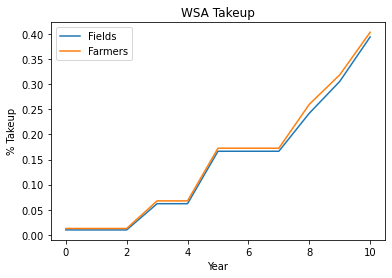

In [58]:
ax = plt.subplot()
ax.set(title="WSA Takeup", xlabel="Year", ylabel="% Takeup")
ax.plot(fieldTakeByYr, label = "Fields")
ax.plot(agentTakeByYr, label = "Farmers")
ax.legend()

### **_Final Yields by Practice_**

In [125]:
endYieldByWsa = data.where(data["Year"] == data["Year"].max())
endYieldByWsa = endYieldByWsa.groupby("implements-WSA")["yield"].mean()

<BarContainer object of 2 artists>

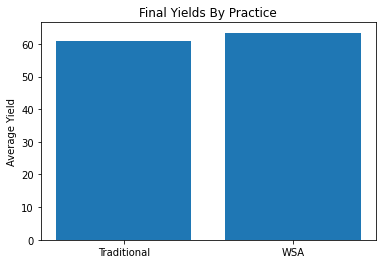

In [230]:
ax = plt.subplot()
ax.set(title="Final Yields By Practice", ylabel="Average Yield")
ax.bar(["Traditional", "WSA"], endYieldByWsa.array)

### **_Yield by Practice over Time_**

In [221]:
yieldByWsaYr = data.groupby(["Year", "implements-WSA"]).mean()["yield"]
yieldByWsaYr_group = yieldByWsaYr.groupby("implements-WSA")

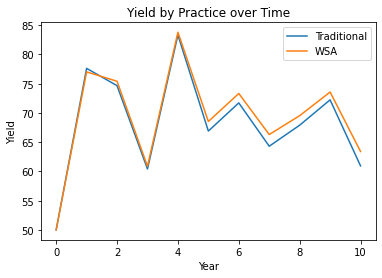

In [222]:
ax = plt.subplot()
ax.set(title="Yield by Practice over Time", xlabel="Year", ylabel="Yield")
for implementsWSA, series in yieldByWsaYr_group:
    label = "WSA" if implementsWSA else "Traditional"
    ax.plot(series.array, label=label)
ax.legend()

### **_Fields per Farmer_**

In [271]:
fieldsByOwner = data.where(data["Year"] == 0)
fieldsByOwner = fieldsByOwner.groupby(["UniqueID", "owner-id"])["who"].count()
fieldsPerFarmer = fieldsByOwner.value_counts().sort_index() / MODEL_RUNS

[Text(0.5, 1.0, 'Distribution of Fields Per Farmer'),
 Text(0.5, 0, 'Number of fields'),
 Text(0, 0.5, 'Number of farmers per model run')]

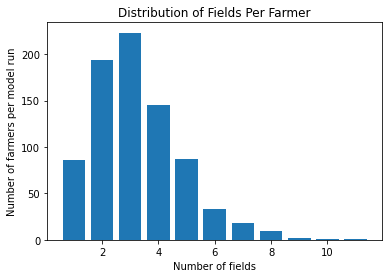

In [272]:
ax = plt.subplot()
ax.bar(fieldsPerFarmer.index, fieldsPerFarmer.array)
ax.set(title="Distribution of Fields Per Farmer", xlabel="Number of fields", ylabel="Number of farmers per model run")

### **_Number of Fields by Practice Choice_**

In [281]:
data.groupby("UniqueID")

{'2023-11-27 14:45:01.473628': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]}